In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

In [28]:
df=pd.read_csv('/content/drive/MyDrive/low birth weight_pred.csv')
df

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,...,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,42,101007,3,3.4,1,26.83,39.75,1.50,20.0,51.0,...,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667,1
1,27,101008,4,3.5,1,17.92,45.00,1.52,22.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147,1
2,158,101009,1,3.0,1,35.00,43.00,1.50,20.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111,1
3,156,101010,1,3.0,1,26.00,40.00,1.48,21.0,51.5,...,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505,1
4,155,101013,1,3.0,1,25.00,56.00,1.51,28.0,49.5,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,257,211029,3,2.7,1,20.83,46.50,1.56,20.5,53.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.70,3.50,19.107495,1
662,509,211037,1,3.3,1,17.83,40.90,1.49,22.0,51.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,4.60,18.422594,1
663,539,211040,1,2.9,1,18.00,42.00,1.54,22.0,51.0,...,0.0,0.0,1.0,0.0,0.0,1.0,NaN,5.50,17.709563,1
664,171,211042,2,2.9,1,23.00,55.00,1.45,27.0,52.5,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.00,-0.50,26.159334,1


Data preprocessing

In [29]:
df.columns

Index(['Unnamed: 0', 'id', 'parity', 'childwt', 'logit', 'mage', 'mwt', 'mht',
       'mdarm', 'head', 'relg', 'habit', 'occup', 'educ', 'workload', 'f11',
       'f21', 'f31', 'f41', 'anemia', 'asthma', 'wm18', 'ageyc', 'boh',
       'ecostat', 'mwt2', 'belly1', 'fand1', 'sis1', 'dis1', 'inject', 'falif',
       'iron', 'worklo', 'f12', 'f22', 'f32', 'f42', 'rest', 'conv1', 'd21',
       'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1', 'db1',
       'mwt3', 'belly2', 'fand2', 'sis2', 'dia2', 'inject2', 'falif2', 'iron2',
       'workl', 'f13', 'f23', 'f33', 'f43', 'rest1', 'conv2', 'd', 'bleed',
       'blddef', 'asthm', 'fever', 'lomot', 'contab', 'db', 'wg1', 'wg2',
       'BMI', 'lda'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 75 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  666 non-null    int64  
 1   id          666 non-null    int64  
 2   parity      666 non-null    int64  
 3   childwt     666 non-null    float64
 4   logit       666 non-null    int64  
 5   mage        666 non-null    float64
 6   mwt         666 non-null    float64
 7   mht         666 non-null    float64
 8   mdarm       666 non-null    float64
 9   head        666 non-null    float64
 10  relg        666 non-null    int64  
 11  habit       666 non-null    int64  
 12  occup       666 non-null    int64  
 13  educ        666 non-null    int64  
 14  workload    666 non-null    int64  
 15  f11         666 non-null    int64  
 16  f21         665 non-null    float64
 17  f31         665 non-null    float64
 18  f41         665 non-null    float64
 19  anemia      666 non-null    i

In [31]:
df.shape

(666, 75)

In [32]:
# Dropping the unwanted columns
df = df.drop(['Unnamed: 0','id','lda','relg','mwt','mwt2','mwt3'], axis = 'columns', inplace = False)


In [33]:
# 2. Rename  columns name  for better understanding
df.rename(columns = {
    'childwt': 'child_weight', 'logit': 'target', 'mage':'mother_age', 'mht': 'mother_height', 'mdarm': 'mid_arm_cir', 'head':'head_cir',
       'occup':'occupation', 'educ':'education', 'f11':'proteinTime_12th_week',
       'wm18':'adult_wom_18', 'ageyc':'age_at_pregnancy', 'boh':'bad_obs_history', 'ecostat':'econoic_status',
       'belly1':'abdominal_girth_20wk', 'fand1':'Fundal_height_20wk', 'sis1':'1st_systolic', 'dis1':'1st_diastolic', 'inject':'injection', 'worklo':'2nd_workload',
       'conv1':'1st_convolusion', 'belly2':'abdominal_girth_28wk',
       'fand2':'Fundal_height_28wk', 'sis2':'2nd_systolic', 'dia2':'2nd_diastolic', 'workl':'3rd_workload', 'f13':'proteinTime_28th_week',
       'conv2':'2nd_convolusion','asthm':'asthma'
}, inplace = True)

In [34]:

df.columns

Index(['parity', 'child_weight', 'target', 'mother_age', 'mother_height',
       'mid_arm_cir', 'head_cir', 'habit', 'occupation', 'education',
       'workload', 'proteinTime_12th_week', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'adult_wom_18', 'age_at_pregnancy', 'bad_obs_history',
       'econoic_status', 'abdominal_girth_20wk', 'Fundal_height_20wk',
       '1st_systolic', '1st_diastolic', 'injection', 'falif', 'iron',
       '2nd_workload', 'f12', 'f22', 'f32', 'f42', 'rest', '1st_convolusion',
       'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1',
       'db1', 'abdominal_girth_28wk', 'Fundal_height_28wk', '2nd_systolic',
       '2nd_diastolic', 'inject2', 'falif2', 'iron2', '3rd_workload',
       'proteinTime_28th_week', 'f23', 'f33', 'f43', 'rest1',
       '2nd_convolusion', 'd', 'bleed', 'blddef', 'asthma', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'],
      dtype='object')

In [35]:
# Handling null & missing values
df.isnull().sum()

parity             0
child_weight       0
target             0
mother_age         0
mother_height      0
                ... 
contab            64
db                67
wg1              317
wg2                0
BMI              116
Length: 68, dtype: int64

In [37]:
df.duplicated().sum()

0

In [41]:
impt = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df = impt.fit_transform(df)

In [42]:
df

array([[  3.        ,   3.4       ,   1.        , ...,   3.25      ,
          6.35      ,  17.66666667],
       [  4.        ,   3.5       ,   1.        , ...,  -0.5       ,
        -45.        ,  19.47714681],
       [  1.        ,   3.        ,   1.        , ...,   4.        ,
          4.5       ,  19.11111111],
       ...,
       [  1.        ,   2.9       ,   1.        , ...,   0.        ,
          5.5       ,  17.70956316],
       [  2.        ,   2.9       ,   1.        , ...,  -1.        ,
         -0.5       ,  26.15933413],
       [  2.        ,   3.        ,   1.        , ...,   1.5       ,
          3.5       ,  18.01720643]])

In [43]:
# dataframe from array
df = pd.DataFrame(df, columns=[
                                           'parity', 'child_weight', 'target', 'mother_age', 'mother_height',
       'mid_arm_cir', 'head_cir', 'habit', 'occupation', 'education',
       'workload', 'proteinTime_12th_week', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'adult_wom_18', 'age_at_pregnancy', 'bad_obs_history',
       'econoic_status', 'abdominal_girth_20wk', 'Fundal_height_20wk',
       '1st_systolic', '1st_diastolic', 'injection', 'falif', 'iron',
       '2nd_workload', 'f12', 'f22', 'f32', 'f42', 'rest', '1st_convolusion',
       'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1',
       'db1', 'abdominal_girth_28wk', 'Fundal_height_28wk', '2nd_systolic',
       '2nd_diastolic', 'inject2', 'falif2', 'iron2', '3rd_workload',
       'proteinTime_28th_week', 'f23', 'f33', 'f43', 'rest1',
       '2nd_convolusion', 'd', 'bleed', 'blddef', 'asthma', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'
])

In [44]:
df.head()

,parity,child_weight,target,mother_age,mother_height,mid_arm_cir,head_cir,habit,occupation,education,...,bleed,blddef,asthma,fever,lomot,contab,db,wg1,wg2,BMI
0,3.0,3.4,1.0,26.83,1.50,20.0,51.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667
1,4.0,3.5,1.0,17.92,1.52,22.0,52.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.50,-45.00,19.477147
2,1.0,3.0,1.0,35.00,1.50,20.0,53.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111
3,1.0,3.0,1.0,26.00,1.48,21.0,51.5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505
4,1.0,3.0,1.0,25.00,1.51,28.0,49.5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326


EDA

In [45]:
df.target.value_counts()


1.0    504
0.0    162
Name: target, dtype: int64

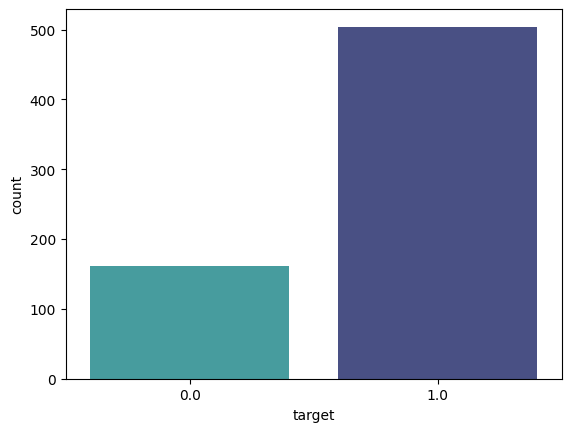

In [49]:
sns.countplot(x="target",data=df,palette="mako_r")
plt.show()

In [50]:
countNBW=len(df[df.target==1])
countLBW=len(df[df.target==0])
print("Percentage of children have normal birth weight:{:.2f}%".format((countNBW/(len(df.target))*100)))
print("Percentage of children have low birth weight:{:.2f}%".format((countLBW/(len(df.target))*100)))

Percentage of children have normal birth weight:75.68%
Percentage of children have low birth weight:24.32%


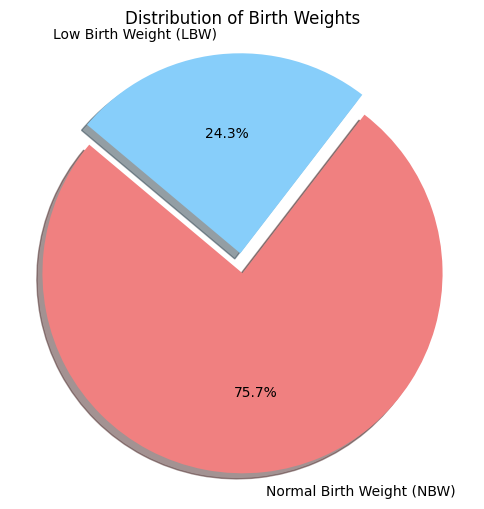

In [51]:
import matplotlib.pyplot as plt

# Calculate the percentages
count_NBW = len(df[df.target == 1])
count_LBW = len(df[df.target == 0])

percentage_NBW = (count_NBW / len(df.target)) * 100
percentage_LBW = (count_LBW / len(df.target)) * 100

# Data to plot
labels = 'Normal Birth Weight (NBW)', 'Low Birth Weight (LBW)'
sizes = [percentage_NBW, percentage_LBW]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice (i.e., 'NBW')

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Birth Weights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


<Axes: xlabel='occupation'>

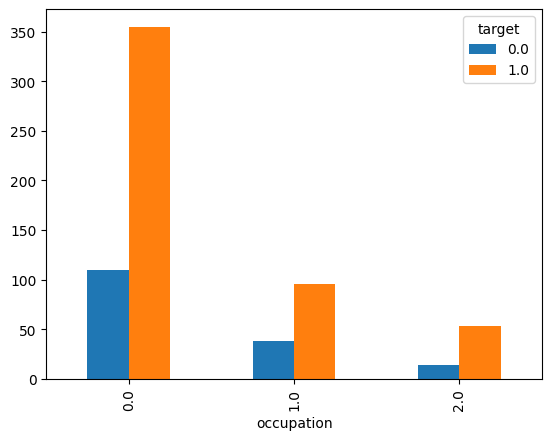

In [56]:
pd.crosstab(df['occupation'],df['target']).plot.bar()


In [58]:
pd.crosstab(df['occupation'],df['target'], normalize='index')

target,0.0,1.0
occupation,,
0.0,0.236559,0.763441
1.0,0.283582,0.716418
2.0,0.208955,0.791045


 while analyzing the mothers’ this lead to think that option 1 women are more at risk of having children with low birth weight.

<Axes: xlabel='bad_obs_history'>

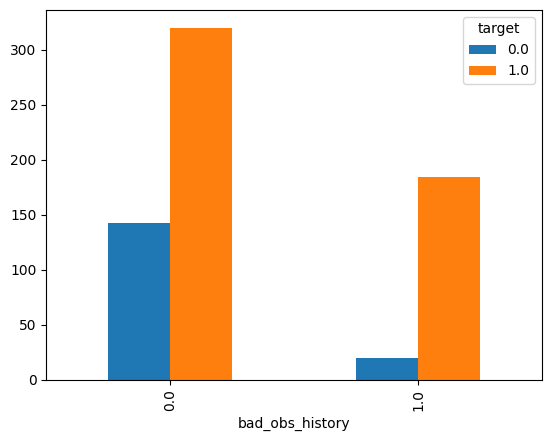

In [59]:
# Low birth weight grouped by Mother's bad_obs_history

pd.crosstab(df['bad_obs_history'],df['target']).plot.bar()

In [61]:
pd.crosstab(df['bad_obs_history'],df['target'], normalize='index')


target,0.0,1.0
bad_obs_history,,
0.0,0.307359,0.692641
1.0,0.098039,0.901961


 women who have bad obsteric history tend to have higher risk compared to those who do not.

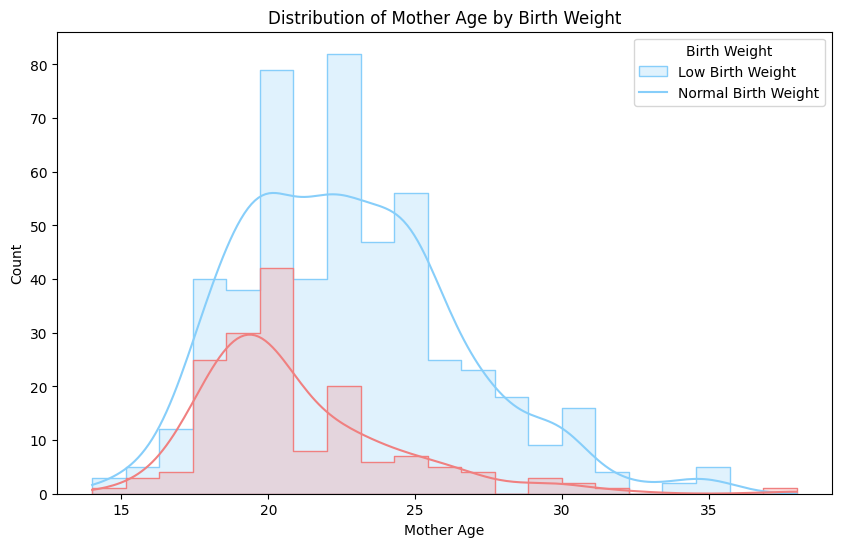

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an interactive histogram with KDE and different colors for the 'target' values
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="mother_age", hue="target", kde=True, element="step", palette={0: 'lightcoral', 1: 'lightskyblue'})

plt.title('Distribution of Mother Age by Birth Weight')
plt.xlabel('Mother Age')
plt.ylabel('Count')
plt.legend(title='Birth Weight', labels=['Low Birth Weight', 'Normal Birth Weight'])

plt.show()


It highlights potential differences in mother age between the two groups, suggesting a need for further investigation into the relationship between mother age and birth weight.

In [63]:
import plotly.express as px

# Create separate DataFrames for normal and LBW children
attr_0 = df[df['target'] == 0]
attr_1 = df[df['target'] == 1]

# Create histograms for mother's age distribution for both groups
fig = px.histogram(df, x="mother_age", color="target", nbins=20,
                   labels={"mother_age": "Mother Age", "target": "Birth Weight"},
                   color_discrete_map={0: 'lightcoral', 1: 'lightskyblue'},
                   title="AGE DISTRIBUTION OF MOTHERS")

# Customize the layout
fig.update_layout(xaxis_title="Mother Age", yaxis_title="Count")
fig.show()



it shows that mothers of low birth weight (LBW) children tend to be younger on average compared to mothers of normal birth weight (NBW) children.

## Feature Engineering

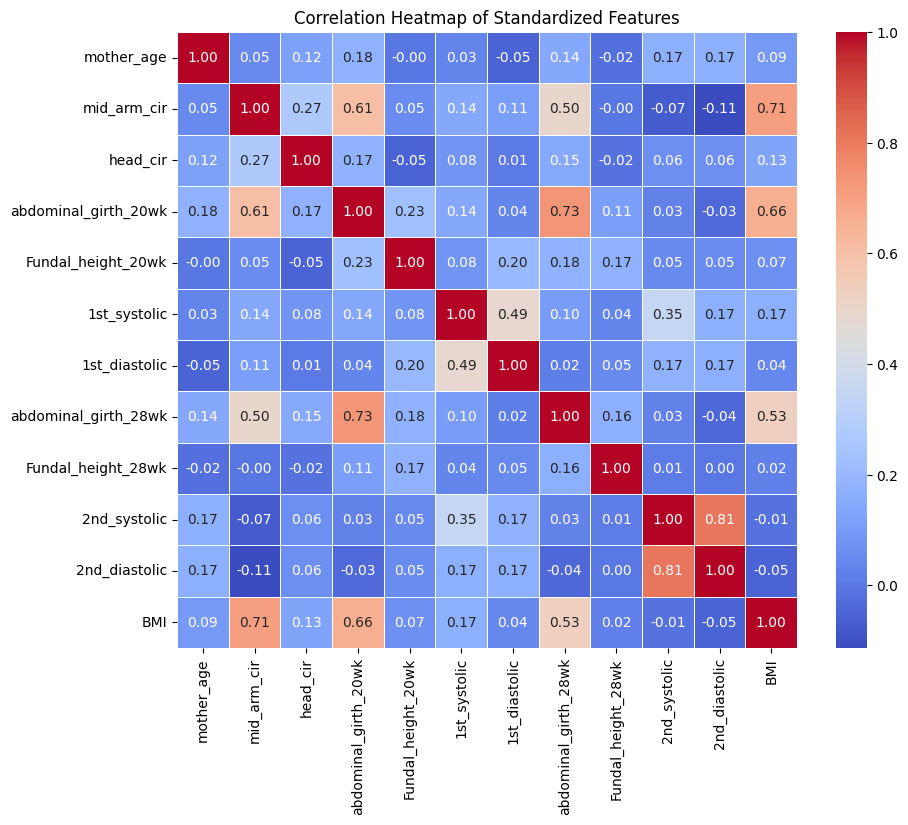

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

# Define the columns to be standardized
columns_to_scale = [
    'mother_age',
    'mid_arm_cir',
    'head_cir',
    'abdominal_girth_20wk',
    'Fundal_height_20wk',
    '1st_systolic',
    '1st_diastolic',
    'abdominal_girth_28wk',
    'Fundal_height_28wk',
    '2nd_systolic',
    '2nd_diastolic',
    'BMI'
]

# Apply standardization to the specified columns
standardScaler = StandardScaler()
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])


# Create a correlation matrix of the standardized features
corr_matrix = df[columns_to_scale].corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Standardized Features")
plt.show()


In [67]:
df.columns


Index(['parity', 'child_weight', 'target', 'mother_age', 'mother_height',
       'mid_arm_cir', 'head_cir', 'habit', 'occupation', 'education',
       'workload', 'proteinTime_12th_week', 'f21', 'f31', 'f41', 'anemia',
       'asthma', 'adult_wom_18', 'age_at_pregnancy', 'bad_obs_history',
       'econoic_status', 'abdominal_girth_20wk', 'Fundal_height_20wk',
       '1st_systolic', '1st_diastolic', 'injection', 'falif', 'iron',
       '2nd_workload', 'f12', 'f22', 'f32', 'f42', 'rest', '1st_convolusion',
       'd21', 'bleed1', 'blddef1', 'asthma2', 'fever1', 'lomot1', 'contab1',
       'db1', 'abdominal_girth_28wk', 'Fundal_height_28wk', '2nd_systolic',
       '2nd_diastolic', 'inject2', 'falif2', 'iron2', '3rd_workload',
       'proteinTime_28th_week', 'f23', 'f33', 'f43', 'rest1',
       '2nd_convolusion', 'd', 'bleed', 'blddef', 'asthma', 'fever', 'lomot',
       'contab', 'db', 'wg1', 'wg2', 'BMI'],
      dtype='object')

In [68]:
# Flittering out the unnecessary columns & store the new dataset which is new_df
new_df = df[[  'parity', 'target', 'mother_age', 'mother_height', 'mid_arm_cir','workload',
                               'anemia', 'asthma', 'bad_obs_history', 'injection', 'falif','iron', '2nd_workload', '1st_convolusion',
                               'bleed1','asthma2','inject2', 'iron2', '2nd_convolusion', 'bleed','fever','BMI']]


Train_test_split & model building

In [69]:
X =  new_df.drop(['target'],axis=1)
y = new_df['target']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20,shuffle=True, random_state=42)


In [74]:

## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1.0    403
0.0    129
Name: target, dtype: int64
Distribution of traget variable in test set
1.0    101
0.0     33
Name: target, dtype: int64


In [77]:
print(X_train.shape)
print(X_test.shape)


(532, 22)
(134, 22)


In [78]:
print(y_train.shape)
print(y_test.shape)

(532,)
(134,)


In [79]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [80]:
# Create and train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

In [81]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [82]:
# Display the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 85.07%

Confusion Matrix:
[[17 16]
 [ 4 97]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.52      0.63        33
         1.0       0.86      0.96      0.91       101

    accuracy                           0.85       134
   macro avg       0.83      0.74      0.77       134
weighted avg       0.85      0.85      0.84       134



In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, roc_auc_score, precision_score, recall_score, f1_score, matthews_corrcoef
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# ... (Code for model evaluation and results)

# Save the model using joblib
model_filename = 'gradient_boosting_model.pkl'
joblib.dump(gb_classifier, model_filename)

# Save the model evaluation results to a CSV file
result_filename = 'model_evaluation_results.csv'
model_results.to_csv(result_filename, index=False)




In [90]:
# Display the model evaluation results
print(model_results)

               Model  Accuracy  Precision  Sensitivity  Specificity  F1 Score  \
0  Gradient Boosting  0.850746   0.858407     0.960396     0.515152  0.906542   

        ROC  Log_Loss  mathew_corrcoef  
0  0.737774   5.37965         0.563589  


In [93]:
pd.DataFrame(model_results)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Gradient Boosting,0.850746,0.858407,0.960396,0.515152,0.906542,0.737774,5.37965,0.563589


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Precision']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Precision'}, axis=1)
              .sort_values('Precision', ascending=True))
  xs = counted['Precision']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Precision', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Sensitivity']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Sensitivity'}, axis=1)
              .sort_values('Sensitivity', ascending=True))
  xs = counted['Sensitivity']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Sensitivity', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Sensitivity')
_ = plt.ylabel('count()')